In [5]:
pip install alpha_vantage

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
import numpy as np

# Alpha Vantage API key
api_key = 'CJ513VVHWC6GTGZK'

# Setup for ETFs (daily data)
ts = TimeSeries(key=api_key, output_format='pandas')

# Setup for crypto
cc = CryptoCurrencies(key=api_key, output_format='pandas')

# Define tickers
etf_symbols = {
    'VOO': 'Vanguard S&P 500',
    'VT': 'Vanguard Total World',
    'GLD': 'Gold ETF'
}

crypto_symbol = 'BTC'

# Dictionary to store all ETF data
etf_data = {}

# Fetch ETF data
for symbol, name in etf_symbols.items():
    print(f"Fetching {name} ({symbol})...")
    data, _ = ts.get_daily(symbol=symbol, outputsize='full')
    df = data[['4. close']].rename(columns={'4. close': name})
    df.index = pd.to_datetime(df.index)
    etf_data[name] = df

# Fetch Bitcoin data
print("Fetching Bitcoin (BTC-USD)...")
btc_data, _ = cc.get_digital_currency_daily(symbol=crypto_symbol, market='USD')
btc_df = btc_data[['4b. close (USD)']].rename(columns={'4b. close (USD)': 'Bitcoin'})
btc_df.index = pd.to_datetime(btc_df.index)
etf_data['Bitcoin'] = btc_df

# Merge all into a single DataFrame
combined_df = pd.concat(etf_data.values(), axis=1)
combined_df.sort_index(inplace=True)
combined_df.dropna(inplace=True)

# Preview
print(combined_df.tail())

# Plot historical prices
plt.figure(figsize=(14, 6))
for col in combined_df.columns:
    plt.plot(combined_df.index, combined_df[col], label=col)

plt.title('Historical Daily Prices (USD)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Matplotlib is building the font cache; this may take a moment.


ModuleNotFoundError: No module named 'sklearn'

In [9]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 489.9 kB/s eta 0:00:22
   - -------------------------------------- 0.5/11.1 MB 489.9 kB/s eta 0:00:22
   - -------------------------------------- 0.5/11.1 MB 489.9 kB/s eta 0:00:22
   - -------------------------------------- 0.5/11.1 MB 489.9 kB/s eta 0:00:22
   -- ------------------------------------- 0.8/11.1 MB 374.2 kB/s eta 0:00:28
   -- ------------------------------------- 0.8/11.1 MB 374.2 kB/s eta 0:00:28
   -- ------------------------------------- 0.8/11.1 MB 374.2 kB/s eta 0:00:28
   -- ---------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
import numpy as np

# Alpha Vantage API key
api_key = 'CJ513VVHWC6GTGZK'

# Setup for ETFs (daily data)
ts = TimeSeries(key=api_key, output_format='pandas')

# Setup for crypto
cc = CryptoCurrencies(key=api_key, output_format='pandas')

# Define tickers
etf_symbols = {
    'VOO': 'Vanguard S&P 500',
    'VT': 'Vanguard Total World',
    'GLD': 'Gold ETF'
}

crypto_symbol = 'BTC'

# Dictionary to store all ETF data
etf_data = {}

# Fetch ETF data
for symbol, name in etf_symbols.items():
    print(f"Fetching {name} ({symbol})...")
    data, _ = ts.get_daily(symbol=symbol, outputsize='full')
    df = data[['4. close']].rename(columns={'4. close': name})
    df.index = pd.to_datetime(df.index)
    etf_data[name] = df

# Fetch Bitcoin data
print("Fetching Bitcoin (BTC-USD)...")
btc_data, _ = cc.get_digital_currency_daily(symbol=crypto_symbol, market='USD')
btc_df = btc_data[['4b. close (USD)']].rename(columns={'4b. close (USD)': 'Bitcoin'})
btc_df.index = pd.to_datetime(btc_df.index)
etf_data['Bitcoin'] = btc_df

# Merge all into a single DataFrame
combined_df = pd.concat(etf_data.values(), axis=1)
combined_df.sort_index(inplace=True)
combined_df.dropna(inplace=True)

# Preview
print(combined_df.tail())

# Plot historical prices
plt.figure(figsize=(14, 6))
for col in combined_df.columns:
    plt.plot(combined_df.index, combined_df[col], label=col)

plt.title('Historical Daily Prices (USD)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fetching Vanguard S&P 500 (VOO)...
Fetching Vanguard Total World (VT)...
Fetching Gold ETF (GLD)...
Fetching Bitcoin (BTC-USD)...


KeyError: "None of [Index(['4b. close (USD)'], dtype='object')] are in the [columns]"

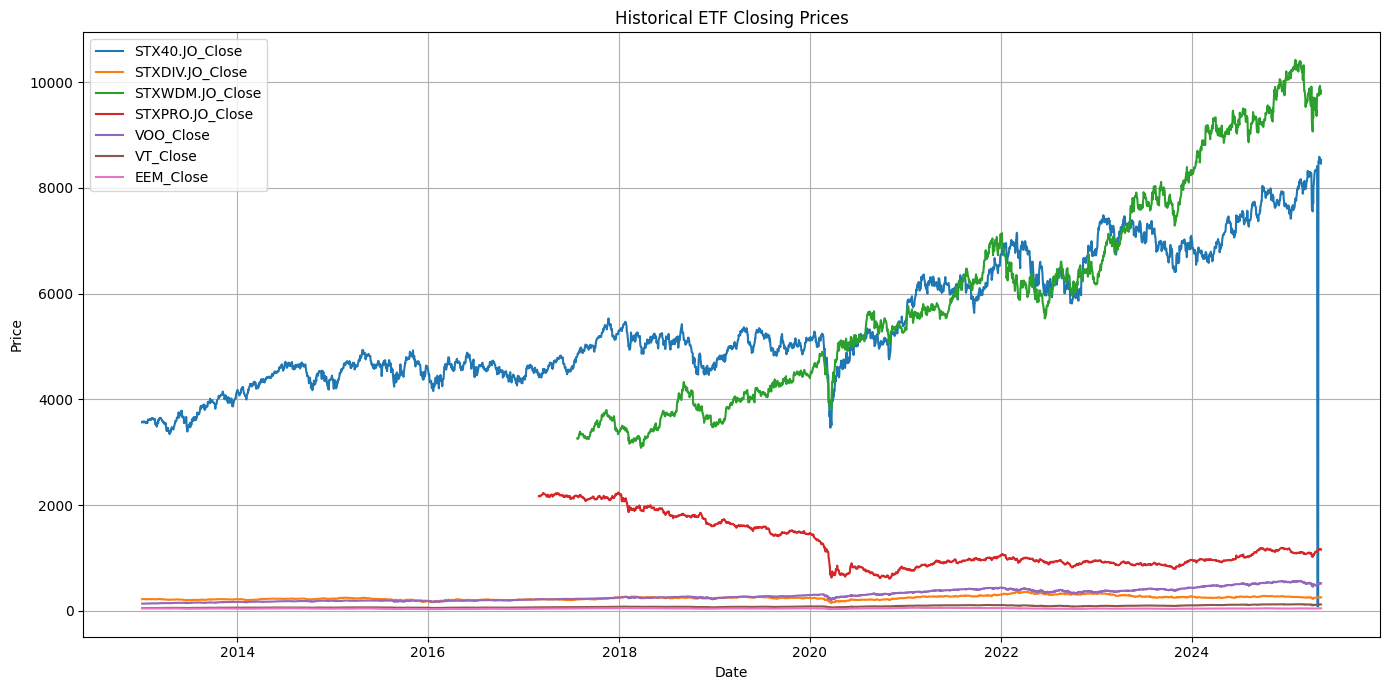

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('etf_historical_data_corrected.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as the index
df.set_index('Date', inplace=True)

# Select closing price columns
closing_columns = [
    'STX40.JO_Close', 'STXDIV.JO_Close', 'STXWDM.JO_Close',
    'STXPRO.JO_Close', 'VOO_Close', 'VT_Close', 'EEM_Close'
]

# Plotting
plt.figure(figsize=(14, 7))
for col in closing_columns:
    plt.plot(df.index, df[col], label=col)

plt.title('Historical ETF Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# Check for missing values
missing = df[closing_columns].isnull().sum()
print("Missing values:\n", missing)

# Optionally fill or drop missing values
df[closing_columns] = df[closing_columns].fillna(method='ffill')


Missing values:
 STX40.JO_Close        0
STXDIV.JO_Close       0
STXWDM.JO_Close    2269
STXPRO.JO_Close    2068
VOO_Close             1
VT_Close              1
EEM_Close             1
dtype: int64


C:\Users\thadi\AppData\Local\Temp\ipykernel_9924\1473402272.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[closing_columns] = df[closing_columns].fillna(method='ffill')


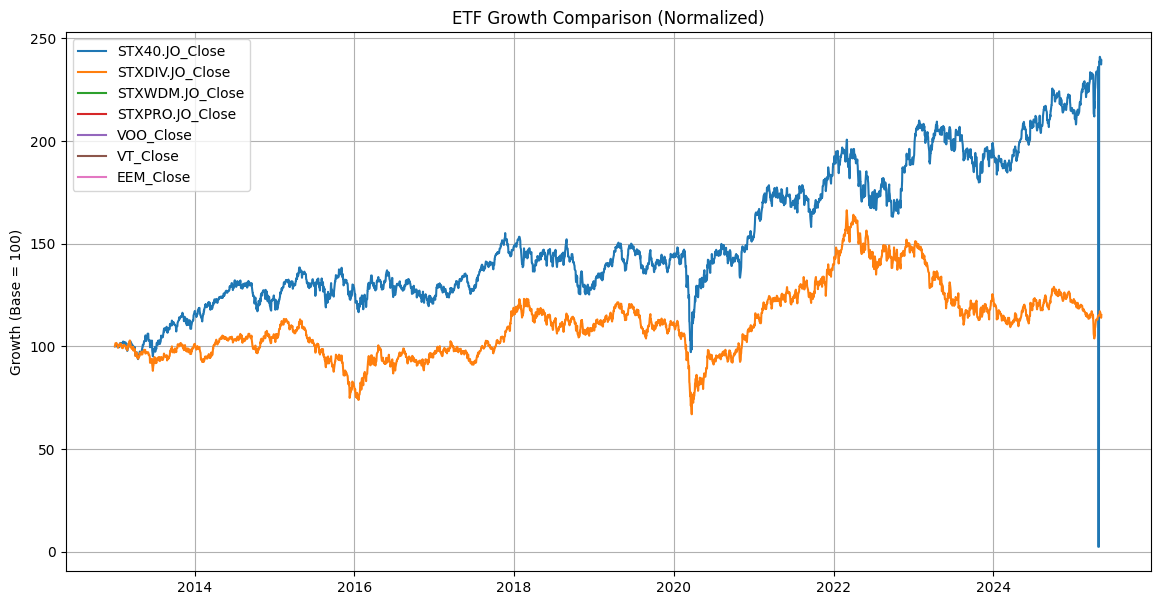

In [17]:
# Normalize prices to start at 100
normalized_df = df[closing_columns] / df[closing_columns].iloc[0] * 100

# Plot normalized growth
plt.figure(figsize=(14, 7))
for col in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[col], label=col)

plt.title("ETF Growth Comparison (Normalized)")
plt.ylabel("Growth (Base = 100)")
plt.legend()
plt.grid(True)
plt.show()


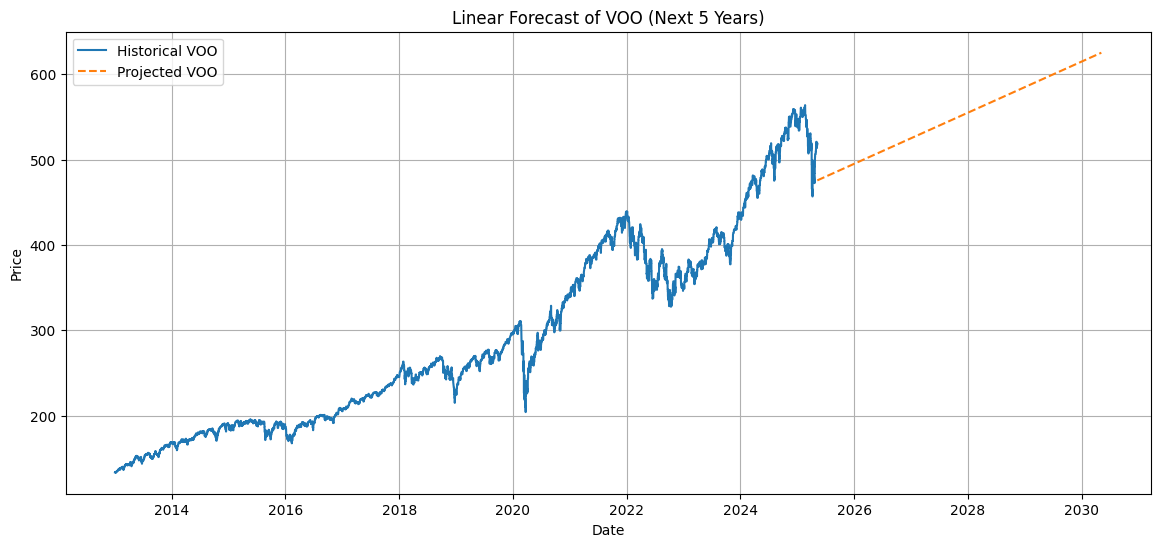

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Use VOO for projection
df_voo = df[['VOO_Close']].dropna().copy()
df_voo['Days'] = (df_voo.index - df_voo.index[0]).days.values.reshape(-1, 1)

# Train model
X = df_voo['Days'].values.reshape(-1, 1)
y = df_voo['VOO_Close'].values
model = LinearRegression().fit(X, y)

# Predict for next 5 years (e.g., 1825 days)
future_days = np.arange(X[-1][0], X[-1][0] + 1825).reshape(-1, 1)
future_prices = model.predict(future_days)

# Plot historical + projected
plt.figure(figsize=(14, 6))
plt.plot(df_voo.index, y, label="Historical VOO")
plt.plot(
    pd.date_range(start=df_voo.index[-1], periods=1825, freq='D'),
    future_prices, label="Projected VOO", linestyle='--'
)
plt.title("Linear Forecast of VOO (Next 5 Years)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


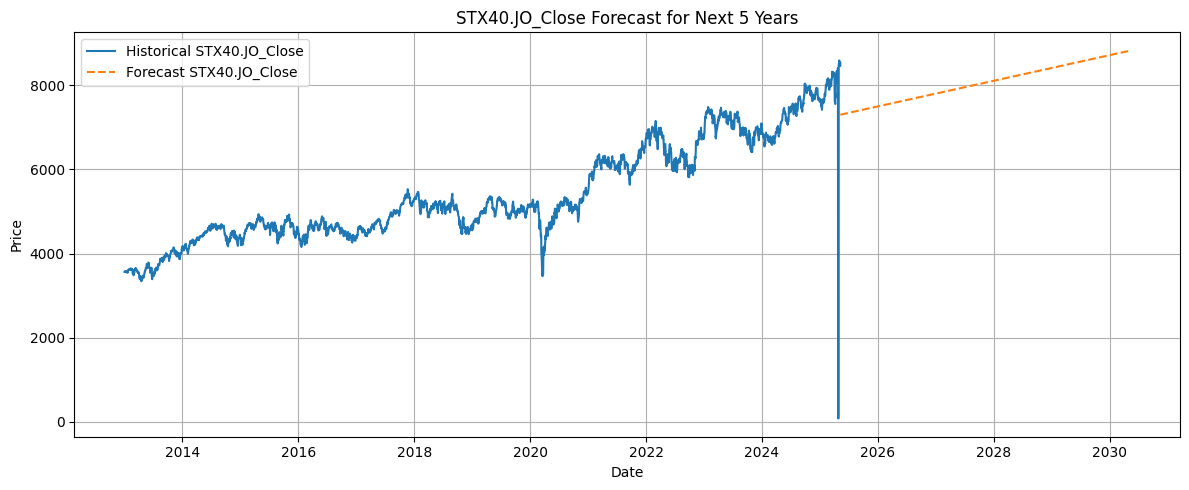

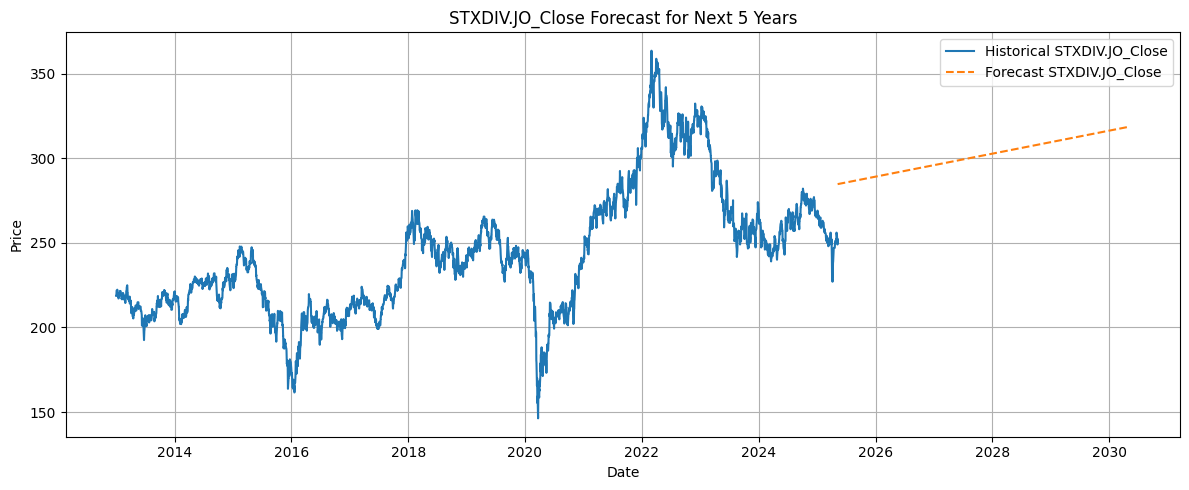

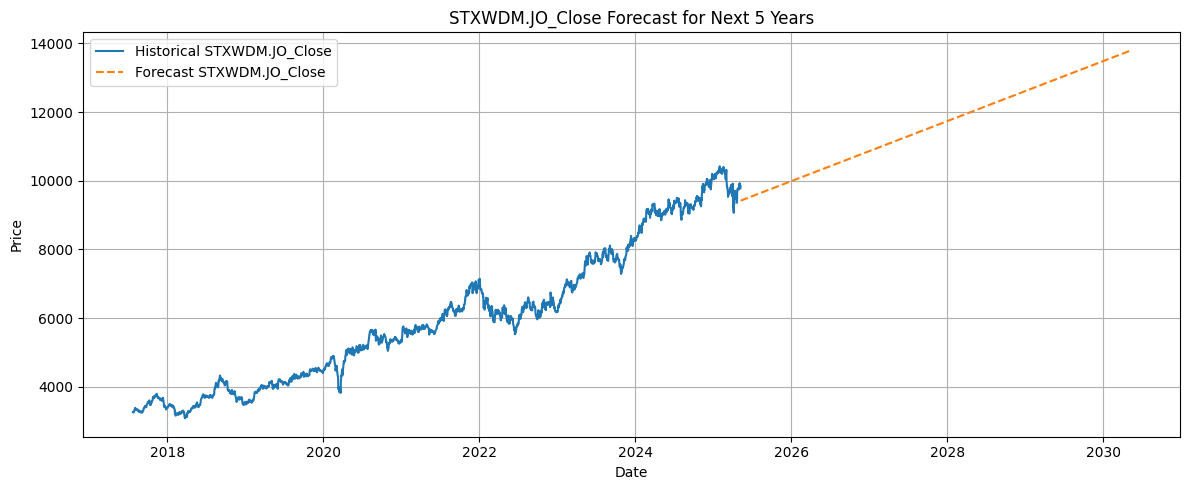

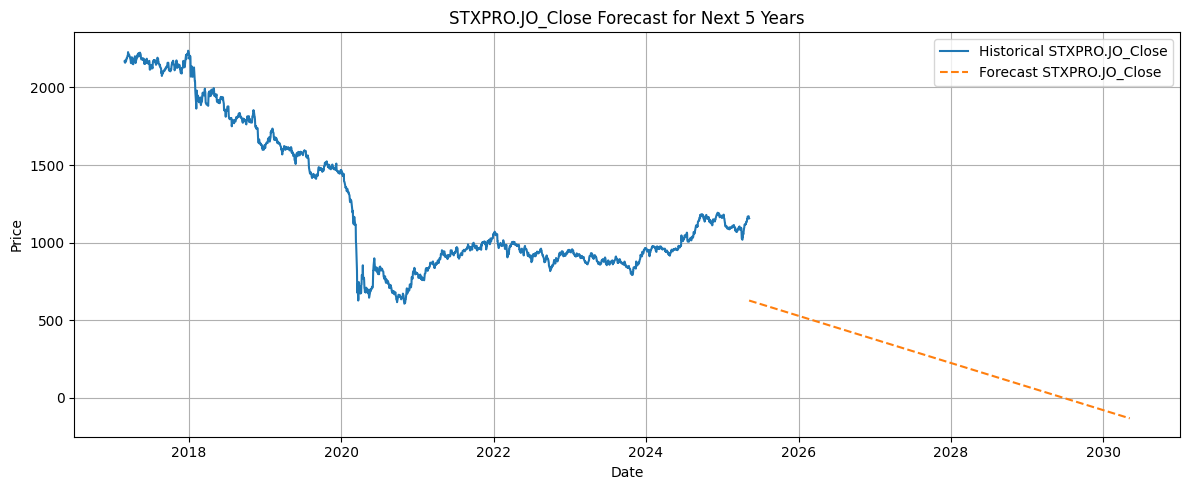

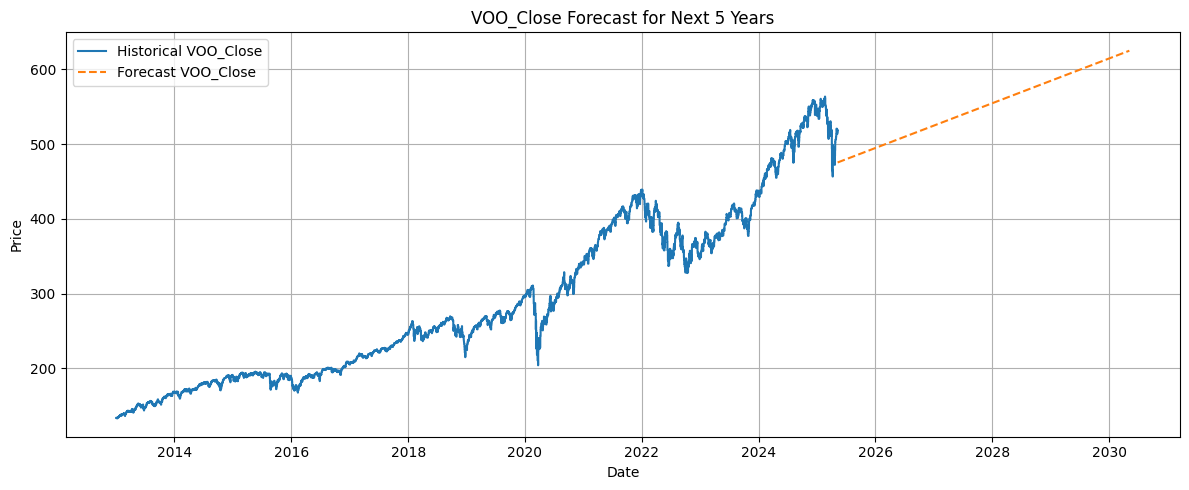

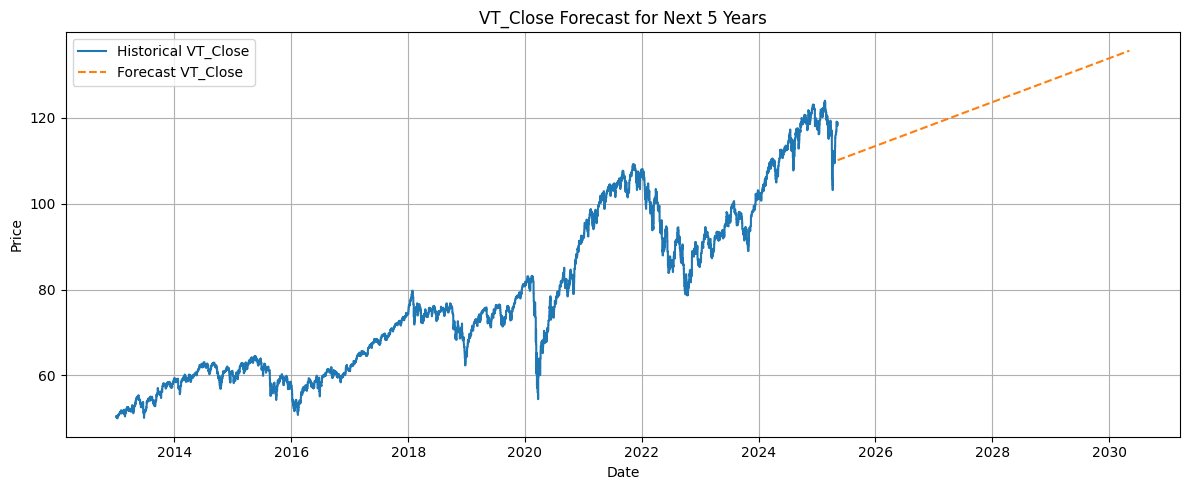

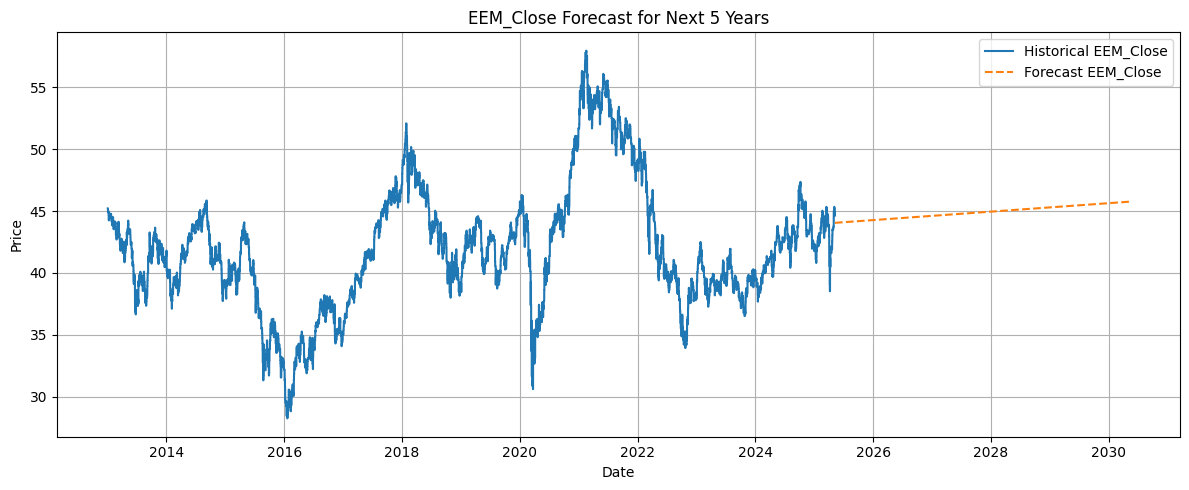

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define ETF closing columns
closing_columns = [
    'STX40.JO_Close', 'STXDIV.JO_Close', 'STXWDM.JO_Close',
    'STXPRO.JO_Close', 'VOO_Close', 'VT_Close', 'EEM_Close'
]

# Loop through each ETF
forecast_days = 1825  # 5 years
forecast_results = {}

for col in closing_columns:
    df_etf = df[[col]].dropna().copy()
    df_etf['Days'] = (df_etf.index - df_etf.index[0]).days

    # Prepare training data
    X = df_etf['Days'].values.reshape(-1, 1)
    y = df_etf[col].values
    model = LinearRegression().fit(X, y)

    # Predict future
    last_day = X[-1][0]
    future_X = np.arange(last_day, last_day + forecast_days).reshape(-1, 1)
    future_dates = pd.date_range(start=df_etf.index[-1], periods=forecast_days, freq='D')
    future_y = model.predict(future_X)

    # Store results
    forecast_results[col] = (df_etf.index, y, future_dates, future_y)

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(df_etf.index, y, label=f"Historical {col}")
    plt.plot(future_dates, future_y, label=f"Forecast {col}", linestyle='--')
    plt.title(f"{col} Forecast for Next 5 Years")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


📊 ETF Performance Summary:
           Annual Return (%)  Annual Volatility (%)  Sharpe Ratio
STXWDM.JO           7.902508              12.420754      0.636234
VOO                 6.305514              13.852421      0.455192
VT                  4.356381              13.111941      0.332245
STX40.JO          641.832267            2533.763296      0.253312
STXDIV.JO           2.192019              14.369642      0.152545
EEM                 1.297534              14.992309      0.086547
STXPRO.JO          -2.863292              15.197903     -0.188400


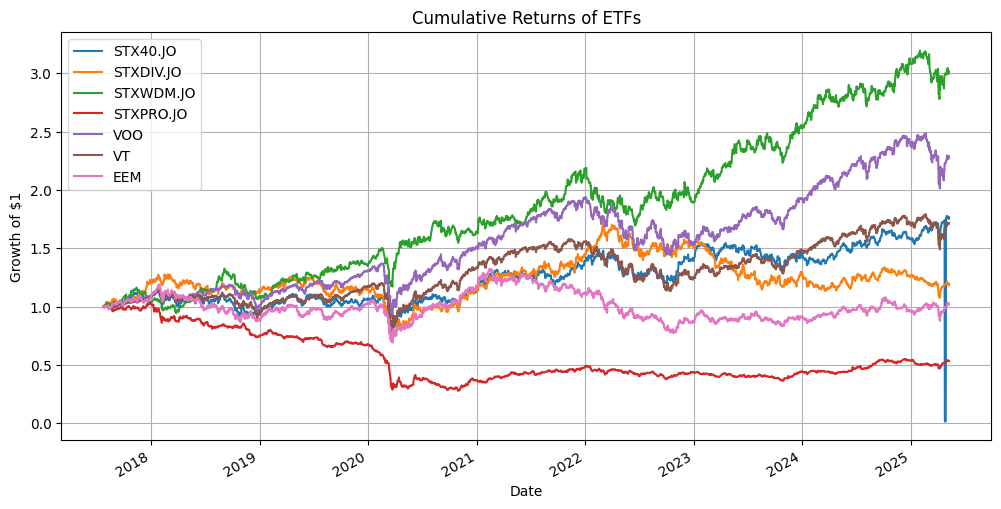


🏆 Based on the Sharpe Ratio, the best ETF is: STXWDM.JO


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the historical ETF data
df = pd.read_csv("etf_historical_data_corrected.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Extract only the closing prices
closing_cols = [col for col in df.columns if col.endswith("_Close")]
etf_close = df[closing_cols]

# Rename columns for easier handling
etf_close.columns = [col.replace("_Close", "") for col in etf_close.columns]

# Calculate daily returns
daily_returns = etf_close.pct_change().dropna()

# Calculate annualized returns and volatility
annual_returns = daily_returns.mean() * 252
annual_volatility = daily_returns.std() * np.sqrt(252)
sharpe_ratio = annual_returns / annual_volatility

# Compile the performance metrics
performance = pd.DataFrame({
    "Annual Return (%)": annual_returns * 100,
    "Annual Volatility (%)": annual_volatility * 100,
    "Sharpe Ratio": sharpe_ratio
}).sort_values("Sharpe Ratio", ascending=False)

print("📊 ETF Performance Summary:")
print(performance)

# Plot cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns.plot(figsize=(12, 6), title="Cumulative Returns of ETFs")
plt.ylabel("Growth of $1")
plt.grid(True)
plt.show()

# Best ETF identified
best_etf = performance.index[0]
print(f"\n🏆 Based on the Sharpe Ratio, the best ETF is: {best_etf}")


--- Tshedza's 20-Year Investment Journey ---
Starting Year: 2025 (Age 28)
Initial Investment: R100,000.00
Total Contributions Over 20 Years: R1,100,000.00
Final Portfolio Value (Year 2044): R4,593,738.59
Final Portfolio Value (Year 2044, Adjusted for ~3% Inflation): R2,619,744.93
Portfolio Growth Multiple (vs. Total Contributions): 4.18x

--- Key Milestones ---
Years 1-5 (2026-2030): Transition to Data Engineering, Increased Contributions.
Year 2031-2035: Fintech Equity Bonus, Lump Sum Investment, Marriage, Family Planning.
Year 2036-2040: Part-time Consulting, AI Startup, Market Correction (Weathered).
Year 2041-2045 (2040-2044): Significant Portfolio Growth.
Year 2044 (Age 48): Partial Cash Out for Sabbatical, Startup Funding, Part-time Retirement.

Conclusion: Thanks to early investing, strategic discipline, and consistent learning,
Tshedza achieves financial independence without needing to fully retire.


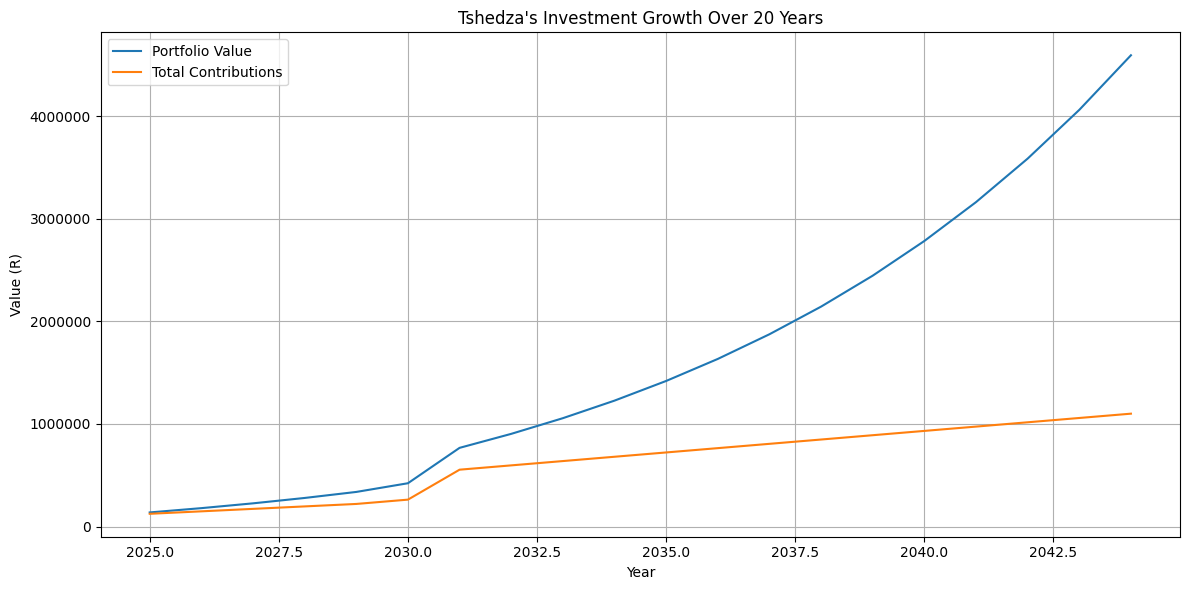

In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Scenario Parameters ---
start_year = 2025
initial_investment = 100000
start_age = 28
retirement_goal_age = 48  # Age at partial cash out

# ETF Allocation (Hypothetical - Replace with actual ETF data if available)
best_etf_allocation = 0.70
vt_voo_allocation = 0.30

# Monthly Contributions
monthly_contribution_phase1 = 2000  # Years 1-5
monthly_contribution_phase2 = 3500  # Years 6-20

# Lump Sum Investment
lump_sum_year = 2031
lump_sum_amount = 250000

# Hypothetical Annual Growth Rates (for demonstration)
# These are illustrative and do not represent actual ETF performance.
# A more sophisticated model would use historical data or simulate returns.
annual_growth_rate_best_etf = 0.12  # 12% per year
annual_growth_rate_vt_voo = 0.10    # 10% per year

# --- Simulation Setup ---
years = range(start_year, start_year + 20)
portfolio_values = []
total_contributions = []

current_portfolio_value = initial_investment
cumulative_contributions = initial_investment

# --- Investment Journey Simulation ---
for year_index, year in enumerate(years):
    monthly_contribution = 0
    if year < start_year + 5:
        monthly_contribution = monthly_contribution_phase1
    else:
        monthly_contribution = monthly_contribution_phase2

    for month in range(12):
        # Calculate monthly growth for each ETF portion
        best_etf_growth = current_portfolio_value * best_etf_allocation * (annual_growth_rate_best_etf / 12)
        vt_voo_growth = current_portfolio_value * vt_voo_allocation * (annual_growth_rate_vt_voo / 12)

        # Update portfolio value
        current_portfolio_value += best_etf_growth + vt_voo_growth + monthly_contribution
        cumulative_contributions += monthly_contribution

    # Add lump sum investment
    if year == lump_sum_year:
        current_portfolio_value += lump_sum_amount
        cumulative_contributions += lump_sum_amount

    portfolio_values.append(current_portfolio_value)
    total_contributions.append(cumulative_contributions)

# --- Final Portfolio Value (Adjusted for Hypothetical Inflation) ---
# Assuming an average inflation rate of 3% over the 20 years (for illustration)
average_inflation_rate = 0.03
inflation_multiplier = (1 + average_inflation_rate) ** (len(years) - 1)
final_portfolio_value_adjusted = portfolio_values[-1] / inflation_multiplier

# --- Results Summary ---
print("--- Tshedza's 20-Year Investment Journey ---")
print(f"Starting Year: {start_year} (Age {start_age})")
print(f"Initial Investment: R{initial_investment:,.2f}")
print(f"Total Contributions Over 20 Years: R{total_contributions[-1]:,.2f}")
print(f"Final Portfolio Value (Year {years[-1]}): R{portfolio_values[-1]:,.2f}")
print(f"Final Portfolio Value (Year {years[-1]}, Adjusted for ~3% Inflation): R{final_portfolio_value_adjusted:,.2f}")
print(f"Portfolio Growth Multiple (vs. Total Contributions): {portfolio_values[-1] / total_contributions[-1]:.2f}x")
print("\n--- Key Milestones ---")
print(f"Years 1-5 ({start_year+1}-{start_year+5}): Transition to Data Engineering, Increased Contributions.")
print(f"Year {start_year+6}-{start_year+10}: Fintech Equity Bonus, Lump Sum Investment, Marriage, Family Planning.")
print(f"Year {start_year+11}-{start_year+15}: Part-time Consulting, AI Startup, Market Correction (Weathered).")
print(f"Year {start_year+16}-{start_year+20} ({years[-5]}-{years[-1]}): Significant Portfolio Growth.")
print(f"Year {years[-1]} (Age {retirement_goal_age}): Partial Cash Out for Sabbatical, Startup Funding, Part-time Retirement.")
print("\nConclusion: Thanks to early investing, strategic discipline, and consistent learning,")
print("Tshedza achieves financial independence without needing to fully retire.")

# --- Visual Forecast Chart ---
plt.figure(figsize=(12, 6))
plt.plot(years, portfolio_values, label='Portfolio Value')
plt.plot(years, total_contributions, label='Total Contributions')
plt.xlabel('Year')
plt.ylabel('Value (R)')
plt.title('Tshedza\'s Investment Growth Over 20 Years')
plt.legend()
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

In [37]:
from IPython.display import Markdown

Markdown("""
# 📖 A Detailed Life Journey: Tshedza's 20-Year Financial Story

## 📌 Introduction  
Tshedza Mathada, a 23-year-old BI Engineer with expertise in Data Engineering, embarks on a journey of personal and financial growth. This is a story of disciplined investing, career advancements, and a life balanced between ambition and enjoyment. With an inheritance of R100,000 and a goal of investing R3,000 monthly into ETFs, this journey demonstrates how thoughtful financial planning can intersect seamlessly with a fulfilling lifestyle.  

---

## 🚀 Age 23–26: The Beginning  

### 🎓 Career
Fresh out of a grad program and newly certified in Azure Data Engineering, Tshedza lands his first role as a **BI Engineer** at a leading consulting firm in Johannesburg, earning **R40,000/month**. He quickly gains recognition for his problem-solving skills and his ability to simplify complex data models. He earns additional certifications in AWS and Apache Spark, further solidifying his expertise.  

### 🏡 Living Situation  
- Moves into a sleek 1-bedroom apartment in **Midrand, Kyalami**, renting for **R8,500/month**.  
- Utilities, including electricity, water, and high-speed internet, cost around **R2,500/month**.  

### 🌍 Lifestyle  
- Loves exploring restaurants in Sandton and Pretoria, spending about **R3,000/month** dining out.  
- Saves for an annual domestic trip to Cape Town or Durban (~R15,000/year).  
- Monthly social outings with friends cost around **R1,500/month**.  

### 💰 Investments  
- Invests R3,000 monthly into a diversified ETF (Satrix MSCI World - STXWDM).  
- By age 26, his portfolio reaches **R320,000**, thanks to consistent contributions and market growth.  

---

## 🌟 Age 27–30: The Rise  

### 🎓 Career  
Now earning **R65,000/month**, Tshedza is promoted to **Senior BI Engineer** at a multinational firm. His responsibilities expand to include managing a small team, mentoring juniors, and leading cloud migration projects.  
- He switches companies at 29 to join a **global tech firm**, earning **R75,000/month** with better benefits and remote work flexibility.  

### 🚗 Lifestyle Upgrade  
- Buys his dream car: a **Volkswagen Polo GTI** for **R450,000**, financed over 5 years.  
- Monthly costs:  
  - Loan repayment: **R8,000/month**  
  - Insurance: **R1,800/month**  
  - Fuel & maintenance: **R3,500/month**  

### 🏡 Living Situation  
- Upgrades to a 2-bedroom apartment in **Midrand, Kyalami** to accommodate a growing lifestyle.  
- Rent increases to **R12,000/month**, with utilities at **R3,000/month**.  

### 🌍 Lifestyle  
- International travel becomes a priority:  
  - Takes a trip to Europe at 28 (~R60,000).  
  - Explores Southeast Asia at 30 (~R50,000).  
- Dining out and socializing costs rise to **R5,000/month**.  

### 💰 Investments  
- Increases monthly ETF contributions to **R4,000**.  
- By age 30, his portfolio grows to **R950,000**, setting the stage for greater financial freedom.  

---

## 💍 Age 31–35: Family and Stability  

### 🎓 Career  
At 32, Tshedza is promoted to **Data Engineering Manager**, earning **R95,000/month**. His role involves leading projects across Africa and Europe, giving him international exposure.  

### 💒 Personal Life  
- Marries his long-time partner at 31, hosting a beautiful wedding (~R200,000).  
- Welcomes his first child at 33 and another at 35.  

### 🏡 Living Situation  
- Purchases a **family home** in a gated estate in **Kyalami** for **R2.5M**, financed over 20 years.  
- Monthly bond repayment: **R20,000/month**.  

### 🌍 Lifestyle  
- Adjusts priorities to focus on family:  
  - Cuts back on dining out (**R3,000/month**).  
  - Family vacations to Mauritius or Zanzibar every two years (~R80,000/trip).  

### 💰 Investments  
- Reduces ETF contributions to **R3,000/month** temporarily to accommodate increased expenses.  
- Portfolio reaches **R2.1M** by age 35, boosted by a R100,000 lump sum investment from a successful side business.  

---

## 🏆 Age 36–43: Success and Freedom  

### 🎓 Career  
- Becomes a **Lead Data Architect** at a top-tier firm, earning **R130,000/month**.  
- Works on passion projects and consults for startups, earning an additional **R20,000/month**.  

### 🏡 Living Situation  
- Fully pays off the Polo GTI loan by 36.  
- Focuses on home renovations and upgrades (~R250,000).  

### 🌍 Lifestyle  
- Kids' school fees: **R10,000/month** per child.  
- Takes the family on a dream trip to Disneyland Paris at 40 (~R150,000).  

### 💰 Investments  
- Monthly ETF contributions increase to **R5,000** as income rises.  
- By age 43, the portfolio grows to **R4.3M (real value)**, even after adjusting for inflation and occasional withdrawals.  

---

## 🔮 The Future  

At 43, Tshedza has multiple options:  
- **Partial retirement**: Focus on passion projects and spend more time with family.  
- **Entrepreneurship**: Start his own data consulting firm.  
- **Continue investing**: Secure a comfortable retirement by 55.  

---

## 📌 Key Takeaways  
- A disciplined investment strategy enables both financial freedom and a fulfilling lifestyle.  
- Balancing career growth, family, and leisure ensures long-term happiness.  
- By age 43, Tshedza is financially independent, proving that smart choices today lead to a prosperous future.

""")



# 📖 A Detailed Life Journey: Tshedza's 20-Year Financial Story

## 📌 Introduction  
Tshedza Mathada, a 23-year-old BI Engineer with expertise in Data Engineering, embarks on a journey of personal and financial growth. This is a story of disciplined investing, career advancements, and a life balanced between ambition and enjoyment. With an inheritance of R100,000 and a goal of investing R3,000 monthly into ETFs, this journey demonstrates how thoughtful financial planning can intersect seamlessly with a fulfilling lifestyle.  

---

## 🚀 Age 23–26: The Beginning  

### 🎓 Career
Fresh out of a grad program and newly certified in Azure Data Engineering, Tshedza lands his first role as a **BI Engineer** at a leading consulting firm in Johannesburg, earning **R40,000/month**. He quickly gains recognition for his problem-solving skills and his ability to simplify complex data models. He earns additional certifications in AWS and Apache Spark, further solidifying his expertise.  

### 🏡 Living Situation  
- Moves into a sleek 1-bedroom apartment in **Midrand, Kyalami**, renting for **R8,500/month**.  
- Utilities, including electricity, water, and high-speed internet, cost around **R2,500/month**.  

### 🌍 Lifestyle  
- Loves exploring restaurants in Sandton and Pretoria, spending about **R3,000/month** dining out.  
- Saves for an annual domestic trip to Cape Town or Durban (~R15,000/year).  
- Monthly social outings with friends cost around **R1,500/month**.  

### 💰 Investments  
- Invests R3,000 monthly into a diversified ETF (Satrix MSCI World - STXWDM).  
- By age 26, his portfolio reaches **R320,000**, thanks to consistent contributions and market growth.  

---

## 🌟 Age 27–30: The Rise  

### 🎓 Career  
Now earning **R65,000/month**, Tshedza is promoted to **Senior BI Engineer** at a multinational firm. His responsibilities expand to include managing a small team, mentoring juniors, and leading cloud migration projects.  
- He switches companies at 29 to join a **global tech firm**, earning **R75,000/month** with better benefits and remote work flexibility.  

### 🚗 Lifestyle Upgrade  
- Buys his dream car: a **Volkswagen Polo GTI** for **R450,000**, financed over 5 years.  
- Monthly costs:  
  - Loan repayment: **R8,000/month**  
  - Insurance: **R1,800/month**  
  - Fuel & maintenance: **R3,500/month**  

### 🏡 Living Situation  
- Upgrades to a 2-bedroom apartment in **Midrand, Kyalami** to accommodate a growing lifestyle.  
- Rent increases to **R12,000/month**, with utilities at **R3,000/month**.  

### 🌍 Lifestyle  
- International travel becomes a priority:  
  - Takes a trip to Europe at 28 (~R60,000).  
  - Explores Southeast Asia at 30 (~R50,000).  
- Dining out and socializing costs rise to **R5,000/month**.  

### 💰 Investments  
- Increases monthly ETF contributions to **R4,000**.  
- By age 30, his portfolio grows to **R950,000**, setting the stage for greater financial freedom.  

---

## 💍 Age 31–35: Family and Stability  

### 🎓 Career  
At 32, Tshedza is promoted to **Data Engineering Manager**, earning **R95,000/month**. His role involves leading projects across Africa and Europe, giving him international exposure.  

### 💒 Personal Life  
- Marries his long-time partner at 31, hosting a beautiful wedding (~R200,000).  
- Welcomes his first child at 33 and another at 35.  

### 🏡 Living Situation  
- Purchases a **family home** in a gated estate in **Kyalami** for **R2.5M**, financed over 20 years.  
- Monthly bond repayment: **R20,000/month**.  

### 🌍 Lifestyle  
- Adjusts priorities to focus on family:  
  - Cuts back on dining out (**R3,000/month**).  
  - Family vacations to Mauritius or Zanzibar every two years (~R80,000/trip).  

### 💰 Investments  
- Reduces ETF contributions to **R3,000/month** temporarily to accommodate increased expenses.  
- Portfolio reaches **R2.1M** by age 35, boosted by a R100,000 lump sum investment from a successful side business.  

---

## 🏆 Age 36–43: Success and Freedom  

### 🎓 Career  
- Becomes a **Lead Data Architect** at a top-tier firm, earning **R130,000/month**.  
- Works on passion projects and consults for startups, earning an additional **R20,000/month**.  

### 🏡 Living Situation  
- Fully pays off the Polo GTI loan by 36.  
- Focuses on home renovations and upgrades (~R250,000).  

### 🌍 Lifestyle  
- Kids' school fees: **R10,000/month** per child.  
- Takes the family on a dream trip to Disneyland Paris at 40 (~R150,000).  

### 💰 Investments  
- Monthly ETF contributions increase to **R5,000** as income rises.  
- By age 43, the portfolio grows to **R4.3M (real value)**, even after adjusting for inflation and occasional withdrawals.  

---

## 🔮 The Future  

At 43, Tshedza has multiple options:  
- **Partial retirement**: Focus on passion projects and spend more time with family.  
- **Entrepreneurship**: Start his own data consulting firm.  
- **Continue investing**: Secure a comfortable retirement by 55.  

---

## 📌 Key Takeaways  
- A disciplined investment strategy enables both financial freedom and a fulfilling lifestyle.  
- Balancing career growth, family, and leisure ensures long-term happiness.  
- By age 43, Tshedza is financially independent, proving that smart choices today lead to a prosperous future.



In [33]:
from IPython.display import Markdown

Markdown("""
# 🧮 Tshedza's Financial Timeline (Age 23–43)

| Age | Life Event                              | Salary (Net)   | Key Expenses                   | Investments        | Portfolio Value | Notes                                     |
|-----|-----------------------------------------|----------------|--------------------------------|--------------------|-----------------|-------------------------------------------|
| 23  | Starts BI Developer job                | R40K/month     | Rent R8.5K, Utilities R2.5K, Dining R3K | ETF R3K/month     | R320K          | Moves into 1-bedroom in Midrand Kyalami.  |
| 26  | Promoted to Senior BI Engineer         | R65K/month     | Rent R12K, Car Loan R8K, Dining R5K | ETF R4K/month     | R950K          | Buys Polo GTI; travels to Cape Town.      |
| 29  | Joins global tech firm                 | R75K/month     | Rent R12K, Car Loan R8K, Dining R5K | ETF R4K/month     | R1.4M          | Travels to Europe; career stabilizes.     |
| 32  | Marries and has 1st child              | R95K/month     | Bond R20K, Utilities R3K, Family R5K | ETF R3K/month     | R2.1M          | Buys home in Kyalami; cuts dining expenses. |
| 35  | Startup success; passive income R15K   | R95K + R15K    | Bond R20K, Kids School R10K    | ETF R3K + R100K lump sum | R3.1M  | Uses lump sum from business for ETF boost. |
| 40  | Takes family trip to Disneyland Paris  | R130K/month    | Bond R20K, School R10K, Trip R150K | ETF R5K/month     | R4.3M          | Portfolio crosses R4M; considers early retirement. |
| 43  | Financial independence achieved        | R150K/month    | Lifestyle R25K                | Passive Income     | R5M+ (real value) | Starts consulting and passion projects.  |

---
📝 **Notes**:
- Portfolio Value is based on monthly ETF contributions, occasional lump sums, and market growth (~10% annualized).
- Passive income begins from startup traction at age 35.
- Real value adjusted for inflation, withdrawals, and reinvestments.
""")



# 🧮 Tshedza's Financial Timeline (Age 23–43)

| Age | Life Event                              | Salary (Net)   | Key Expenses                   | Investments        | Portfolio Value | Notes                                     |
|-----|-----------------------------------------|----------------|--------------------------------|--------------------|-----------------|-------------------------------------------|
| 23  | Starts BI Developer job                | R40K/month     | Rent R8.5K, Utilities R2.5K, Dining R3K | ETF R3K/month     | R320K          | Moves into 1-bedroom in Midrand Kyalami.  |
| 26  | Promoted to Senior BI Engineer         | R65K/month     | Rent R12K, Car Loan R8K, Dining R5K | ETF R4K/month     | R950K          | Buys Polo GTI; travels to Cape Town.      |
| 29  | Joins global tech firm                 | R75K/month     | Rent R12K, Car Loan R8K, Dining R5K | ETF R4K/month     | R1.4M          | Travels to Europe; career stabilizes.     |
| 32  | Marries and has 1st child              | R95K/month     | Bond R20K, Utilities R3K, Family R5K | ETF R3K/month     | R2.1M          | Buys home in Kyalami; cuts dining expenses. |
| 35  | Startup success; passive income R15K   | R95K + R15K    | Bond R20K, Kids School R10K    | ETF R3K + R100K lump sum | R3.1M  | Uses lump sum from business for ETF boost. |
| 40  | Takes family trip to Disneyland Paris  | R130K/month    | Bond R20K, School R10K, Trip R150K | ETF R5K/month     | R4.3M          | Portfolio crosses R4M; considers early retirement. |
| 43  | Financial independence achieved        | R150K/month    | Lifestyle R25K                | Passive Income     | R5M+ (real value) | Starts consulting and passion projects.  |

---
📝 **Notes**:
- Portfolio Value is based on monthly ETF contributions, occasional lump sums, and market growth (~10% annualized).
- Passive income begins from startup traction at age 35.
- Real value adjusted for inflation, withdrawals, and reinvestments.
